# Static maps

### Data

You should have following Shapefiles in the `data` folder:

  - addresses.shp
  - metro.shp
  - roads.shp
  - some.geojson
  - TravelTimes_to_5975375_RailwayStation.shp

In case you don't see the required files in the `data` folder, you can download them [from this link](https://github.com/Automating-GIS-processes/Lesson-5-Making-Maps/raw/master/data/dataE5.zip).

You can download and extract the data into a folder `data` using these commands:

```
    cd autogis/notebooks/L5
    wget https://github.com/Automating-GIS-processes/Lesson-5-Making-Maps/raw/master/data/dataE5.zip
    unzip dataE5.zip -d data
```

## Static maps in geopandas

We have already plotted basic static maps using geopandas during the previous weeks of this course. Remember that when using the [plot() method in geopandas](http://geopandas.org/mapping.html#mapping-tools), we are actually using the tools available from [matplotlib pyplot](https://matplotlib.org/api/pyplot_api.html#pyplot). 

Let's refresh our memory about the basics of plotting maps by creating a static accessibility map with roads and metro line on it (three layers on top of each other in the same figure). Before plotting the layers, we need to check that they are in the same coordinate reference system.

As usual, we start by importing the useful modules and reading in the input files:

In [1]:
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt

# Filepaths
grid_fp = "data/TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = "data/roads.shp"
metro_fp = "data/metro.shp"

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

Let's check the coordinate reference systems (crs) of the input files. 

In [2]:
# Check the crs of each layer
print(roads.crs)
print(metro.crs)
print(grid.crs)

epsg:2392
epsg:2392
epsg:3067


Roads and the metro are in an old Finnish crs (EPSG:2392), while the grid is in ETRS89 / TM35FIN (EPSG:3067):

In [3]:
# Check CRS names
print("Roads crs:", CRS(roads.crs).name)
print("Metro crs:", CRS(metro.crs).name)
print("Grid crs: ",CRS(grid.crs).name)

Roads crs: KKJ / Finland zone 2
Metro crs: KKJ / Finland zone 2
Grid crs:  ETRS89 / TM35FIN(E,N)


Let's re-project geometries to ETRS89 / TM35FIN based on the grid crs:

In [4]:
# Reproject geometries to ETRS89 / TM35FIN based on the grid crs:
roads = roads.to_crs(crs=grid.crs)
metro = metro.to_crs(crs=grid.crs)

Now the layers should be in the same crs

In [5]:
roads.crs == metro.crs == grid.crs

True

Once the data are in the same projection, we can plot them on a map.

<div class="alert alert-info">

**Check your understanding**

- Make a visualization using the `plot()` -function in Geopandas
- plot first the grid using "quantiles" classification scheme
- then add roads and metro in the same plot

</div>


Plotting options for the polygon: 

- Define the classification scheme using the `scheme` parameter
- Change the colormap using the `cmap` parameter. See [colormap options from matplotlib documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html#choosing-colormaps-in-matplotlib).
- You can add a little bit of transparency for the grid using the `alpha` parameter (ranges from 0 to 1 where 0 is fully transparent)

Plotting options fo the lines:

 - adjust color using `color` parameter. See [color options from matplotlib pyplot documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.colors).
 - change `linewidth` if needed
 
For better control of the figure and axes, use the plt.subplots function before plotting the layers. See more info in [matplotlib documentation](https://matplotlib.org/3.3.3/gallery/subplots_axes_and_figures/subplots_demo.html#a-figure-with-just-one-subplot).

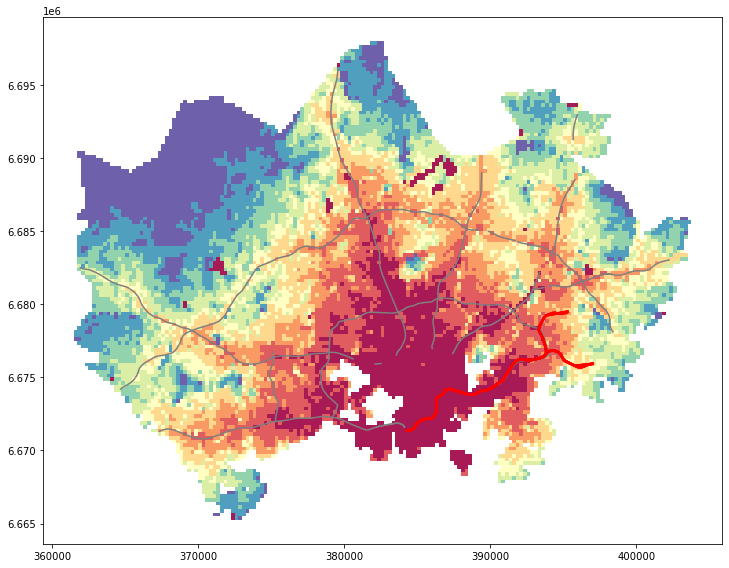

In [6]:
# Create one subplot. Control figure size in here.
fig, ax = plt.subplots(figsize=(12,8))

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(ax=ax, column="car_r_t", linewidth=0.03, cmap="Spectral", scheme="quantiles", k=9, alpha=0.9)

# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=ax, color="grey", linewidth=1.5)

# Add metro on top of the previous map
metro.plot(ax=ax, color="red", linewidth=2.5)

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 300 dpi
outfp = "static_map.png"
plt.savefig(outfp, dpi=300)

## Adding a legend

It is possible to enable legend for a geopandas plot by setting `legend=True` in the plotting parameters.
If plotting the figure without a classification scheme you get a color bar as the legend item and it is easy to add a label for the legend using `legend_kwds`. You can read more about creating a legend via geopandas [in here](https://geopandas.org/mapping.html#creating-a-legend).

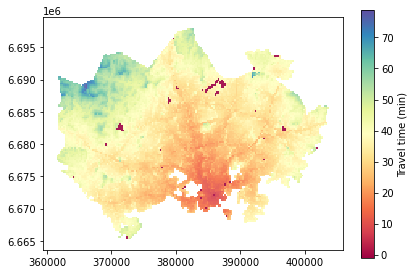

In [7]:
# Create one subplot. Control figure size in here.
fig, ax = plt.subplots(figsize=(6,4))

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(ax=ax, column="car_r_t", 
          linewidth=0.03, 
          cmap="Spectral", 
          alpha=0.9, 
          legend=True, 
          legend_kwds={'label': "Travel time (min)"}
         )

#ax.get_legend().set_bbox_to_anchor(8)
#ax.get_legend().set_title("Legend title")

# Remove the empty white-space around the axes
plt.tight_layout()

If plotting a map using a classification scheme, we get a different kind of ledend that shows the class values. In this case, we can control the position and title of the legend using matplotlib tools. We first need to access the [Legend object](https://matplotlib.org/3.3.2/api/legend_api.html#matplotlib.legend.Legend) and then change it's properties.

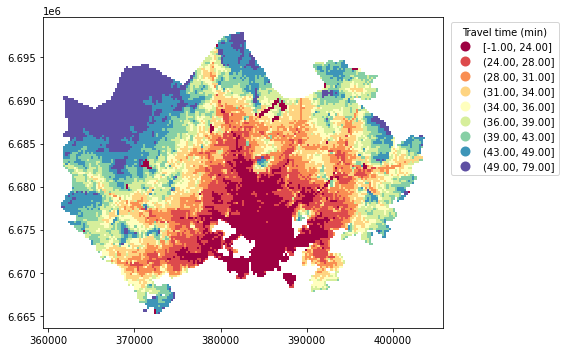

In [8]:
# Create one subplot. Control figure size in here.
fig, ax = plt.subplots(figsize=(10,5))

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(ax=ax, 
          column="car_r_t", 
          linewidth=0.03, 
          cmap="Spectral", 
          scheme="quantiles", 
          k=9, 
          legend=True, 
          )

# Re-position the legend and set a title
ax.get_legend().set_bbox_to_anchor((1.3,1))
ax.get_legend().set_title("Travel time (min)")

# Remove the empty white-space around the axes
plt.tight_layout()

You can read more info about adjusting legends in the matplotlig [legend guide](https://matplotlib.org/tutorials/intermediate/legend_guide.html).

## Adding basemap from external source

It is often useful to add a basemap to your visualization that shows e.g. streets, placenames and other contextual information. This can be done easily by using ready-made background map tiles from different providers such as [OpenStreetMap](https://wiki.openstreetmap.org/wiki/Tiles) or [Stamen Design](http://maps.stamen.com). A Python library called [contextily](https://github.com/darribas/contextily) is a handy package that can be used to fetch geospatial raster files and add them to your maps. Map tiles are typically distributed in [Web Mercator projection (EPSG:3857)](http://spatialreference.org/ref/sr-org/epsg3857-wgs84-web-mercator-auxiliary-sphere/), hence **it is often necessary to reproject all the spatial data into** [Web Mercator](https://en.wikipedia.org/wiki/Web_Mercator_projection) before visualizing the data.

In this tutorial, we will see how to add a basemap underneath our previous visualization.

- Read in the travel time data:

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
%matplotlib inline

# Filepaths
grid_fp = "data/TravelTimes_to_5975375_RailwayStation.shp"

# Read data
grid = gpd.read_file(grid_fp)
grid.head(3)

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,30133,50,31872,56,5785642,32940,121,146,32940,113,133,5975375,29626,423,"POLYGON ((382500.000 6697750.000, 382250.000 6..."


Check the input crs:

In [10]:
print(grid.crs)

epsg:3067


Reproject the layer to ESPG 3857 projection (Web Mercator):

In [11]:
# Reproject to EPSG 3857
data = grid.to_crs(epsg=3857)
print(data.crs)

epsg:3857


Now the crs is `epsg:3857`. Also the coordinate values in the `geometry` column have changed:

In [12]:
data.head(2)

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((2767221.646 8489079.101, 2766716.966..."
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((2767726.329 8489095.521, 2767221.646..."


Next, we can plot our data using geopandas and add a basemap for our plot by using a function called `add_basemap()` from contextily:

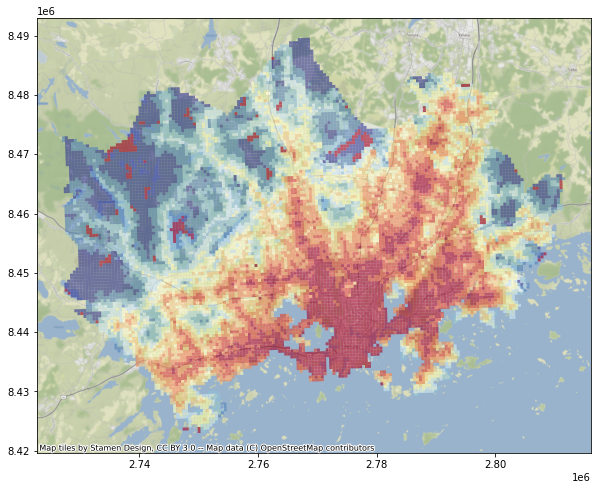

In [13]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Plot the data
data.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=9, alpha=0.6)

# Add basemap 
ctx.add_basemap(ax)

As we can see, now the map has a background map that is by default using the Stamen Terrain background from [Stamen Design](http://maps.stamen.com/#terrain). 

There are also various other possible data sources and styles for background maps. 

Contextily's `tile_providers` contain a list of providers and styles that can be used to control the appearence of your background map:

In [14]:
dir(ctx.providers)

['BasemapAT',
 'CartoDB',
 'Esri',
 'FreeMapSK',
 'GeoportailFrance',
 'HERE',
 'HikeBike',
 'Hydda',
 'JusticeMap',
 'MapBox',
 'MtbMap',
 'NASAGIBS',
 'NLS',
 'OneMapSG',
 'OpenFireMap',
 'OpenMapSurfer',
 'OpenPtMap',
 'OpenRailwayMap',
 'OpenSeaMap',
 'OpenStreetMap',
 'OpenTopoMap',
 'OpenWeatherMap',
 'SafeCast',
 'Stamen',
 'Thunderforest',
 'Wikimedia',
 'nlmaps']

There are multiple style options for most of these providers, for example: 

In [15]:
ctx.providers.OpenStreetMap.keys()

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH'])

It is possible to change the tile provider using the `source` -parameter in `add_basemap()` function. Let's see how we can change the bacground map as the basic OpenStreetMap background:

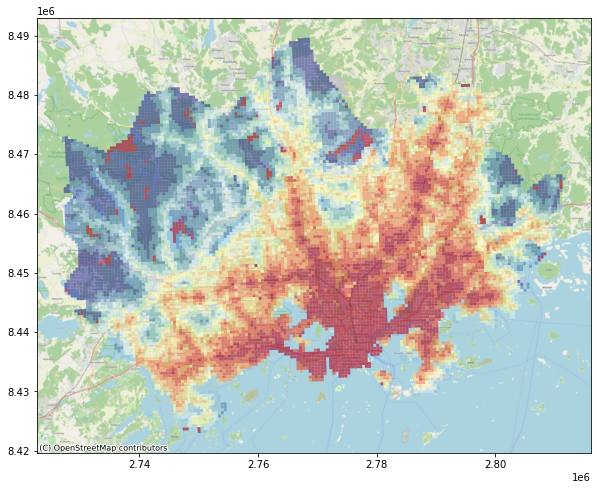

In [16]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Plot the data
data.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=9, alpha=0.6)

# Add basemap with basic OpenStreetMap visualization
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

 Let's take a subset of our data to see a bit better the background map characteristics:

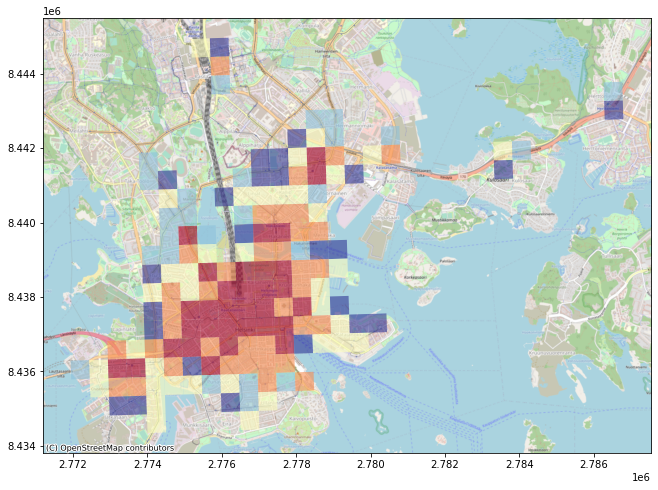

In [17]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Subset the data to seel only grid squares near the destination
subset = data.loc[(data['pt_r_t']>=0) & (data['pt_r_t']<=15)]

# Plot the data from subset
subset.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=5, alpha=0.6)

# Add basemap with `OSM_A` style
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

As we can see now our map has much more details in it as the zoom level of the background map is larger. By default `contextily` sets the zoom level automatically but it is possible to also control that manually using parameter `zoom`. The zoom level is by default specified as `auto` but you can control that by passing in [zoom level](https://wiki.openstreetmap.org/wiki/Zoom_levels) as numbers ranging typically from 1 to 19 (the larger the number, the more details your basemap will have).

- Let's reduce the level of detail from our map by passing `zoom=11`:

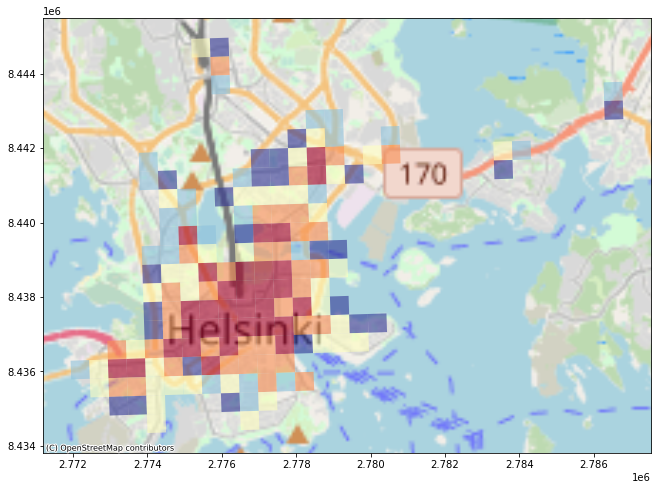

In [18]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Plot the data from subset
subset.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=5, alpha=0.6)

# Add basemap with `OSM_A` style using zoom level of 11
ctx.add_basemap(ax, zoom=11, source=ctx.providers.OpenStreetMap.Mapnik)

As we can see, the map has now less detail (a bit too blurry for such a small area).

We can also use `ax.set_xlim()` and `ax.set_ylim()` -parameters to crop our map without altering the data. The parameters takes as input the coordinates for minimum and maximum on both axis (x and y). We can also change / remove the contribution text by using parameter `attribution`

Let's add details about the data source, plot the original data, and crop the map:

In [19]:
credits = "Travel time data by Digital Geography Lab, Map Data © OpenStreetMap contributors"

(8430000.0, 8470000.0)

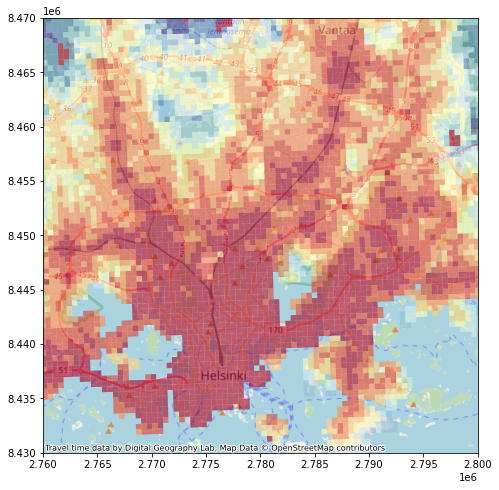

In [20]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Plot the data
data.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=9, alpha=0.6)

# Add basemap with `OSM_A` style using zoom level of 11 
# Modify the attribution 
ctx.add_basemap(ax, zoom=11, attribution=credits, source=ctx.providers.OpenStreetMap.Mapnik)

# Crop the figure
ax.set_xlim(2760000, 2800000)
ax.set_ylim(8430000, 8470000)

It is also possible to use many other map tiles from different [Tile Map Services](https://en.m.wikipedia.org/wiki/Tile_Map_Service) as the background map. A good list of different available sources can be found from [here](http://leaflet-extras.github.io/leaflet-providers/preview/). When using map tiles from different sources, it is necessary to parse a url address to the tile provider following a format defined by the provider. 

Next, we will see how to use map tiles provided by CartoDB. To do that we need to parse the url address following their [definition](https://github.com/CartoDB/basemap-styles#1-web-raster-basemaps) `'https://{s}.basemaps.cartocdn.com/{style}/{z}/{x}/{y}{scale}.png'` where:

 - {s}: one of the available subdomains, either [a,b,c,d]
 - {z} : Zoom level. We support from 0 to 20 zoom levels in OSM tiling system.
 - {x},{y}: Tile coordinates in OSM tiling system
 - {scale}: OPTIONAL "@2x" for double resolution tiles
 - {style}: Map style, possible value is one of:
 
    - light_all,
    - dark_all,
    - light_nolabels,
    - light_only_labels,
    - dark_nolabels,
    - dark_only_labels,
    - rastertiles/voyager,
    - rastertiles/voyager_nolabels,
    - rastertiles/voyager_only_labels,
    - rastertiles/voyager_labels_under
    
- We will use this information to parse the parameters in a way that contextily wants them:

(8435000.0, 8442500.0)

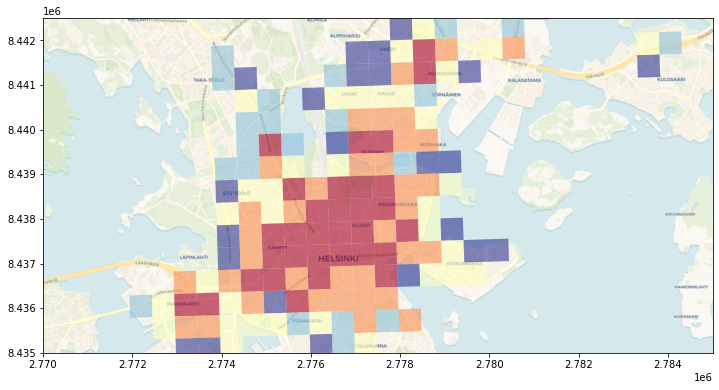

In [21]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# The formatting should follow: 'https://{s}.basemaps.cartocdn.com/{style}/{z}/{x}/{y}{scale}.png'
# Specify the style to use
style = "rastertiles/voyager"
cartodb_url = 'https://a.basemaps.cartocdn.com/%s/{z}/{x}/{y}.png' % style

# Plot the data from subset
subset.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=5, alpha=0.6)
    
# Add basemap with `OSM_A` style using zoom level of 14 
ctx.add_basemap(ax, zoom=14, attribution="", source=cartodb_url)

# Crop the figure
ax.set_xlim(2770000, 2785000)
ax.set_ylim(8435000, 8442500)

As we can see now we have yet again different kind of background map, now coming from CartoDB. 

Let's make a minor modification and change the style from `"rastertiles/voyager"` to `"dark_all"`:

(8435000.0, 8442500.0)

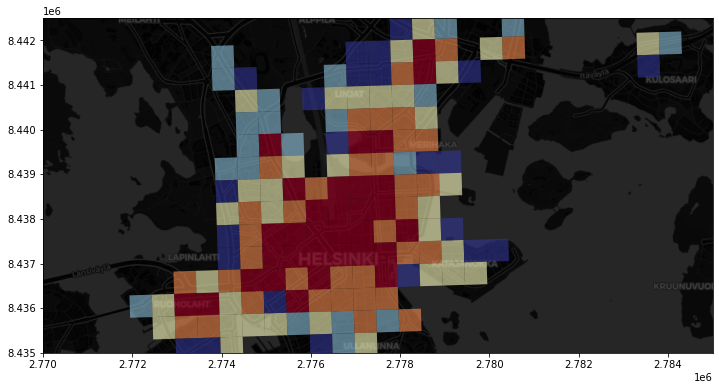

In [22]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# The formatting should follow: 'https://{s}.basemaps.cartocdn.com/{style}/{z}/{x}/{y}{r}.png'
# Specify the style to use
style = "dark_all"
cartodb_url = 'https://a.basemaps.cartocdn.com/%s/{z}/{x}/{y}.png' % style

# Plot the data from subset
subset.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=5, alpha=0.6)

# Add basemap with `OSM_A` style using zoom level of 14 
ctx.add_basemap(ax, zoom=13, attribution="", source=cartodb_url)

# Crop the figure
ax.set_xlim(2770000, 2785000)
ax.set_ylim(8435000, 8442500)

Great! Now we have dark background map fetched from CartoDB. In a similar manner, you can use any map tiles from various other tile providers such as the ones listed in [leaflet-providers](http://leaflet-extras.github.io/leaflet-providers/preview/).